# Importing libraries 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [9]:
# Reading the Data 
Data_Matches = pd.read_csv('matches.csv')
Data_deliveries = pd.read_csv('deliveries.csv')
Data_Matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
Data_Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [11]:
Data_Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [15]:
Data_Matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [17]:
Data_Matches.shape

(756, 18)

In [20]:
Data_Matches["season"].sort_values().unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019], dtype=int64)

C:\Users\POP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


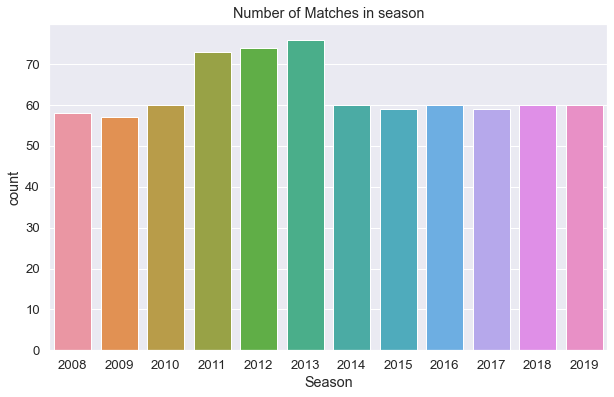

In [23]:
plt.subplots(figsize=(10,6))
sns.countplot(Data_Matches['season'], data=Data_Matches)
plt.xlabel("Season")
plt.title("Number of Matches in season")
plt.show()

In [25]:
Data_Matches["winner"].value_counts().to_frame(name="Number of Wins")

,Number of Wins
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29
Gujarat Lions,13


C:\Users\POP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


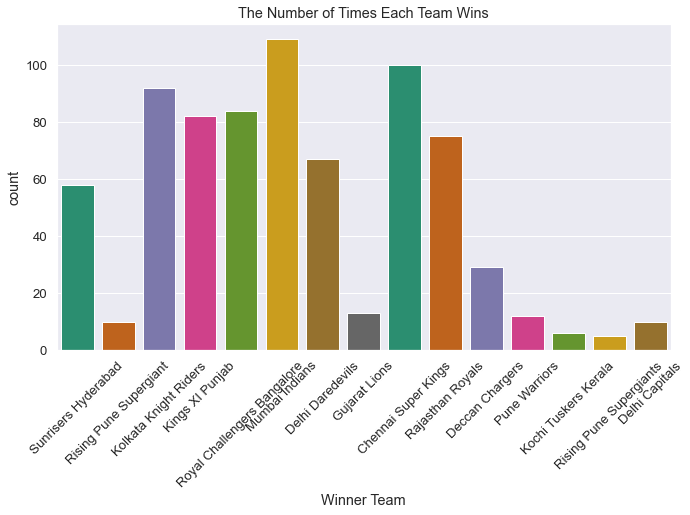

In [26]:
plt.subplots(figsize=(11,6))
sns.countplot(Data_Matches['winner'], data=Data_Matches, orient='h', palette="Dark2")
plt.xticks(rotation=45)
plt.xlabel("Winner Team")
plt.title('The Number of Times Each Team Wins')
plt.show()

In [27]:
winner_team = pd.concat([Data_Matches["team1"],Data_Matches["team2"], Data_Matches["winner"]],axis=1, names=["Team1","Team2","WinnerTeam"])
winner_team.head(5)

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore


C:\Users\POP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The Most Team Win the Toss')

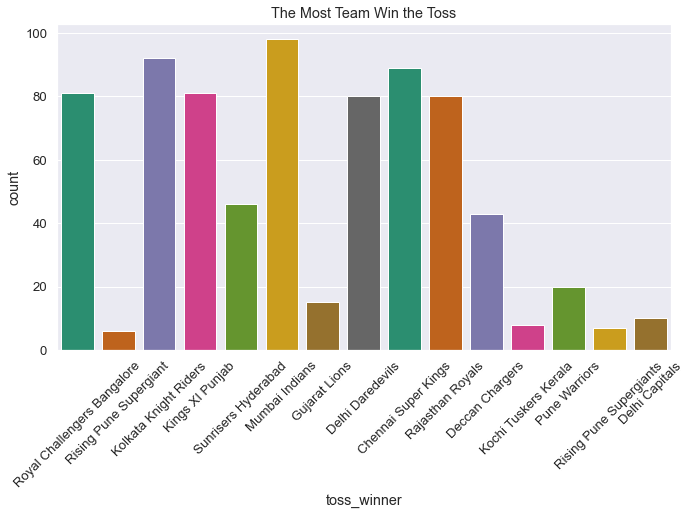

In [29]:
plt.subplots(figsize=(11,6))
sns.countplot(Data_Matches["toss_winner"], data=Data_Matches, palette="Dark2")
plt.xticks(rotation=45)
plt.title("The Most Team Win the Toss")

C:\Users\POP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

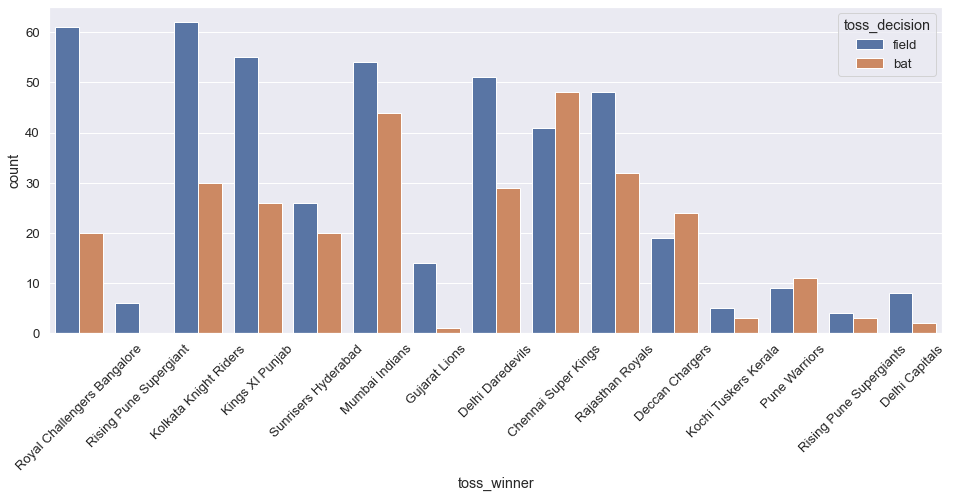

In [30]:
plt.subplots(figsize=(16,6))
sns.countplot(Data_Matches["toss_winner"], hue=Data_Matches["toss_decision"])
plt.xticks(rotation=45)

Text(0.5, 1.0, 'The Percentage of Toss Decision')

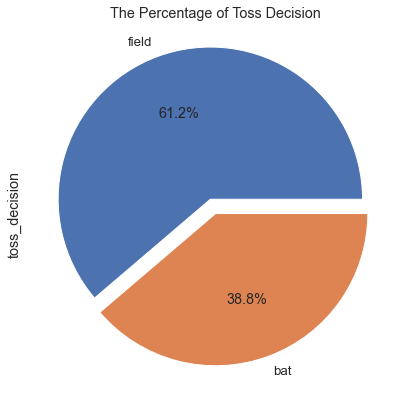

In [32]:
matches_data_copy =Data_Matches.copy()
matches_data_copy["toss_decision"] = Data_Matches["toss_decision"].replace({1:"field",0:"bat"})
matches_data_copy["toss_decision"].value_counts().plot(kind="pie", explode=[0.1,0], autopct="%1.1f%%")
plt.title("The Percentage of Toss Decision")

C:\Users\POP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The most cities that host matches')

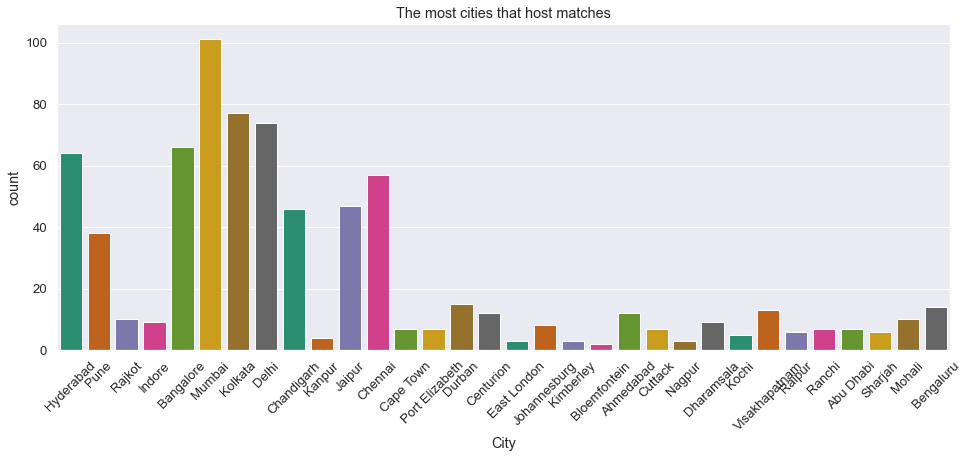

In [35]:
plt.subplots(figsize=(16,6))
sns.countplot(Data_Matches["city"], data=Data_Matches, palette="Dark2")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.title("The most cities that host matches")

In [38]:
Data_Matches.iloc[Data_Matches["win_by_wickets"].idxmax()]['winner']

'Kolkata Knight Riders'

In [39]:
Data_Matches.iloc[Data_Matches["win_by_runs"].idxmax()]['winner']

'Mumbai Indians'

C:\Users\POP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The most 10 player achieved player of the match')

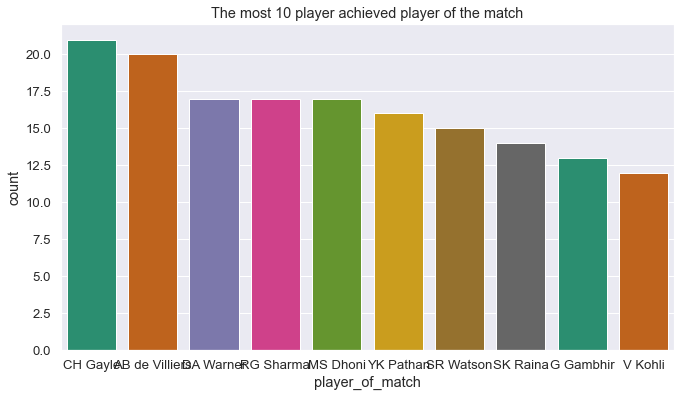

In [41]:
plt.subplots(figsize=(11,6))
sns.countplot('player_of_match',data=Data_Matches,order=Data_Matches["player_of_match"].value_counts().index[:10], palette="Dark2")
plt.title("The most 10 player achieved player of the match")

C:\Users\POP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The most 15 venue that host matches')

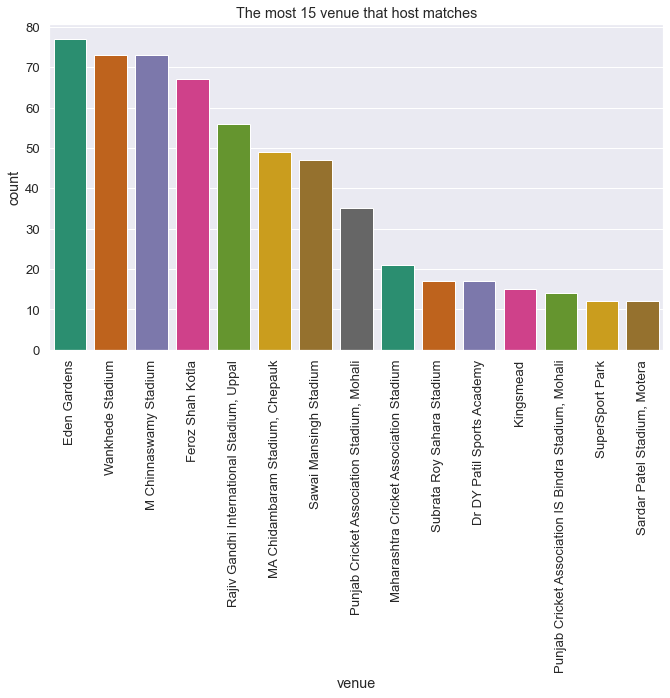

In [42]:
plt.subplots(figsize=(11,6))
sns.countplot("venue", data=Data_Matches, order=Data_Matches["venue"].value_counts().index[:15], palette="Dark2")
plt.xticks(rotation=90)
plt.title("The most 15 venue that host matches")

C:\Users\POP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Umpire')

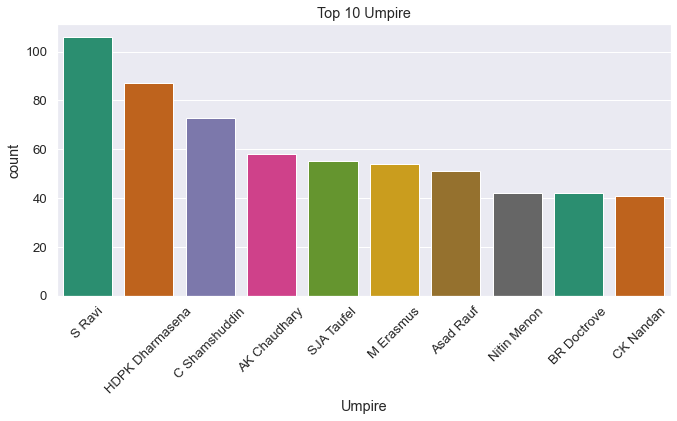

In [43]:
umpire_df = pd.melt(Data_Matches, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
umpire_df["value"].value_counts()
plt.subplots(figsize=(11,5))
sns.countplot("value", data=umpire_df, order=umpire_df["value"].value_counts().index[:10], palette="Dark2")
plt.xticks(rotation=45)
plt.title("Top 10 Umpire")
plt.xlabel("Umpire")

In [44]:
score_season_for_teams =Data_Matches.drop_duplicates(subset=['season'])[['season', 'winner']].reset_index(drop=True).sort_values(by="season")
score_season_for_teams

,season,winner
1,2008,Kolkata Knight Riders
2,2009,Mumbai Indians
3,2010,Kolkata Knight Riders
4,2011,Chennai Super Kings
5,2012,Mumbai Indians
6,2013,Kolkata Knight Riders
7,2014,Kolkata Knight Riders
8,2015,Kolkata Knight Riders
9,2016,Rising Pune Supergiants
0,2017,Sunrisers Hyderabad


In [46]:
Data_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [48]:
Data_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [49]:
Data_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [50]:
Data_deliveries["batting_team"].value_counts()

Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

<AxesSubplot:xlabel='count', ylabel='batting_team'>

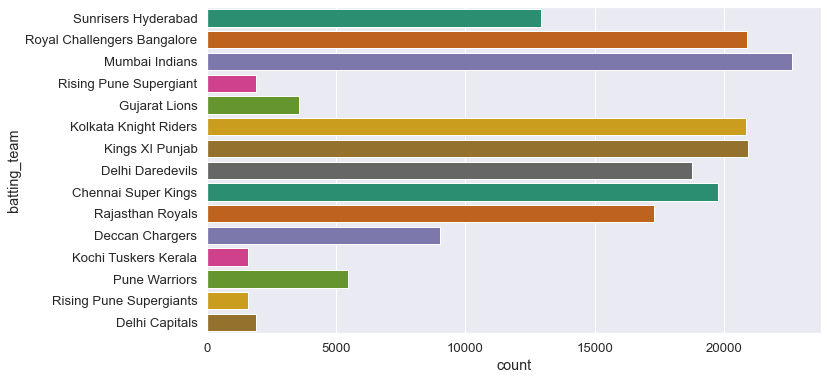

In [51]:
plt.subplots(figsize=(11,6))
sns.countplot(y="batting_team", data=Data_deliveries, palette="Dark2")

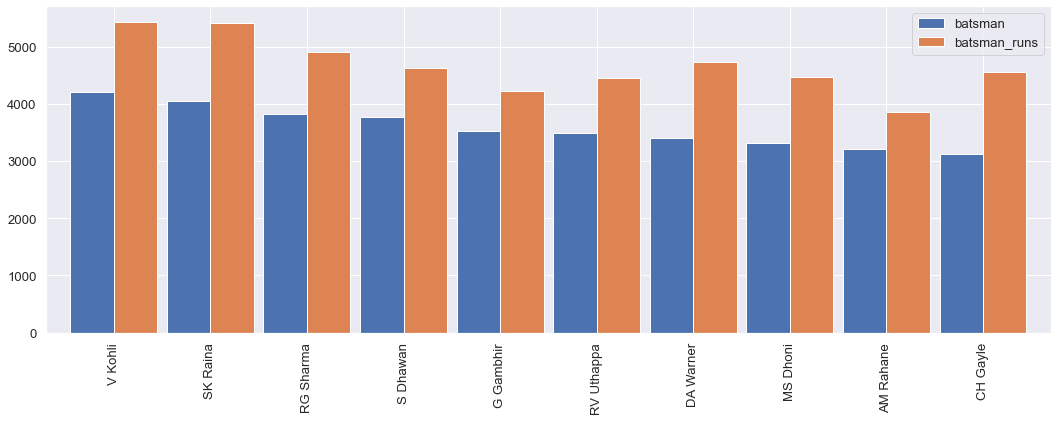

In [53]:
bats_man=Data_deliveries['batsman'].value_counts()[:10].to_frame()
country_kill = Data_deliveries.groupby('batsman')["batsman_runs"].sum().to_frame()
bats_man.merge(country_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.legend(["batsman","batsman_runs"])
plt.show()